# 1.0 Spam Message Detection : NLP Classification 

## 1.1 Importing Libraries and dataset : 

* **Ennviroment Name : Spam_msg**

* **References :**
    * **https://github.com/prateek025/SMS_Spam_Ham/blob/master/Spam-Ham.ipynb**
    * **https://towardsdatascience.com/nlp-classification-in-python-pycaret-approach-vs-the-traditional-approach-602d38d29f06** 

In [17]:
# Multiple Jupyter cell output 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

from sklearn.model_selection import GridSearchCV

In [19]:
df1 = pd.read_csv("C:\\Users\\Raj_jhumpa\\Downloads\\My Projects\\Machine Learning\\Datasets\\SMS_Spam_Ham_Raw.csv ")
df1.head()

,Flag,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Renaming SMS column to SMS original : 

df1.rename(columns={'SMS ':'SMS_Original'}, inplace=True)

In [21]:
df1.head()

,Flag,SMS_Original
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.0 Data Wrangling : 

### 2.1 : Changing the flag column to Numerical Boolean Values : 

In [22]:
df1 = pd.get_dummies(data = df1, columns = ['Flag'], drop_first=True)
df1.head(3)

,SMS_Original,Flag_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1


### 2.2 Pre-Processing on Text Data : 

In [29]:
import re
from bs4 import BeautifulSoup

In [31]:
#Removing HTTPS Tage : 

df2 = df1
df2['SMS_Processed'] = df2['SMS_Original'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only in ...
1,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,Nah I don t think he goes to usf he lives arou...


In [32]:
#Lower Case : 

df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x: x.lower())
df2.head()

,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah i don t think he goes to usf he lives arou...


In [33]:
#Remove punctuations
df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah i don t think he goes to usf he lives arou...


In [34]:
#Remove unicodes

%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

Wall time: 20.8 ms


,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah i don t think he goes to usf he lives arou...


In [41]:
# Remove stopwords
stop_words = stopwords.words('english')
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

Wall time: 119 ms


,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


In [42]:
# Lemmatize the text

lemmer = WordNetLemmatizer()

%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

Wall time: 1.75 s


,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though


In [21]:
#Removing Stop words again after Lemmatize
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())
display(df2.tail())

Wall time: 255 ms


,SMS_Original,Flag_spam,SMS_Processed
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though


,SMS_Original,Flag_spam,SMS_Processed
5569,This is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u u 750 pound prize 2...
5570,Will Ã¼ b going to esplanade fr home?,0,b going esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,pity mood suggestion
5572,The guy did some bitching but I acted like i'd...,0,guy bitching acted like interested buying some...
5573,Rofl. Its true to its name,0,rofl true name


## 3.0 Embedding on Pre-Processed Data : 

### 3.1 EDA on most common words and rare words : 

In [43]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [44]:
#10 most common and 10 most rare words
common_words = get_n_words(df2['SMS_Processed'], "top", 15)
rare_words = get_n_words(df2['SMS_Processed'], "bottom", 15)

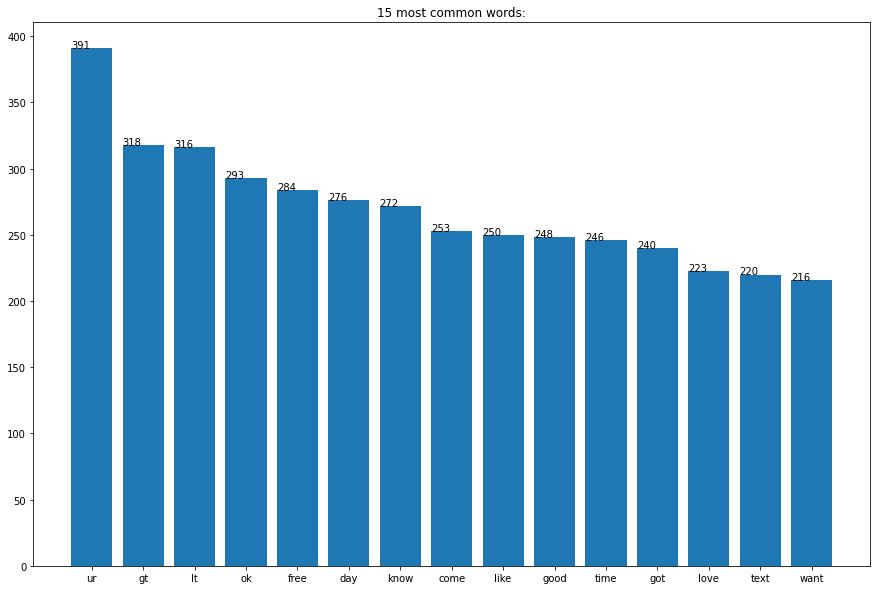

In [45]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show();

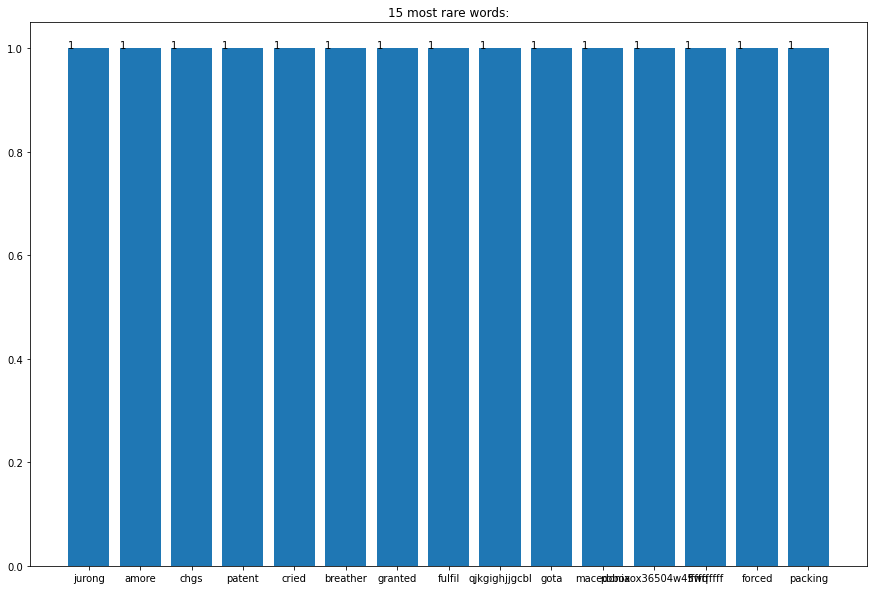

In [46]:

rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show();

### 3.2 BOW -TF Embedding : 

In [47]:
# BOW-TF Embedding

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

%time tpl_tf = tf_vectorizer.fit_transform(df2['SMS_Processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
df_tf.head()

Wall time: 246 ms


'Bow-TF :'

(5574, 77)

,already,back,call,claim,co,come,da,day,dear,dont,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:

#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
df_tf_m.drop(columns=['SMS_Original', 'SMS_Processed'], inplace = True)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(5574, 78)


,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
5569,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,already,back,call,claim,co,come,da,day,dear,dont,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3.3 BOW TF_IDF Embedding : 

In [49]:

# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=[1,3])

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df2['SMS_Processed'])
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=df2.index)
display(df_tfidf.head())

Wall time: 149 ms


'Bow-TF:IDF :'

(5574, 53)

,back,call,co,come,da,day,dont,free,get,go,...,tell,text,think,time,today,txt,ur,want,week,well
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.686387,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556018,0.0,0.000000,...,0.0,0.575908,0.000000,0.0,0.0,0.599312,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.647166,...,0.0,0.000000,0.762349,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [50]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
df_tfidf_m.drop(columns=['SMS_Original', 'SMS_Processed'], inplace = True)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(5574, 54)


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556018,0.0,...,0.0,0.575908,0.000000,0.0,0.0,0.599312,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.762349,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
5569,1,0.0,0.618628,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.785684,0.0,0.0,0.0,0.0,0.000000,0.0
5570,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5571,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5572,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.549964,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.630038,0.0
5573,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


## 4.0 Model Building : 

In [51]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [52]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['Flag_spam']
    X = df.drop('Flag_spam', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4737, 77)
Test Data Dimensions :  (837, 77)

 Random Forest Classifier
Wall time: 1.32 s

 Confusion Matrix


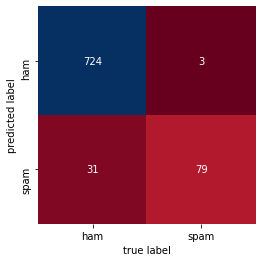


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       727
           1       0.96      0.72      0.82       110

    accuracy                           0.96       837
   macro avg       0.96      0.86      0.90       837
weighted avg       0.96      0.96      0.96       837

Overall Accuracy :  95.94
Precision Score :  96.34
Recall Score :  71.82
AUC :  96.21 



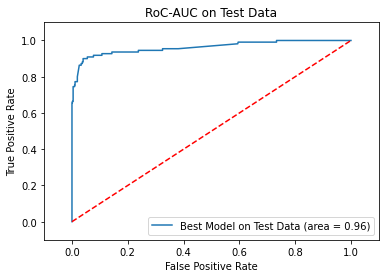

--------------------------------------------------------------------------

 AdaBoost Classifier
Wall time: 1.2 s

 Confusion Matrix


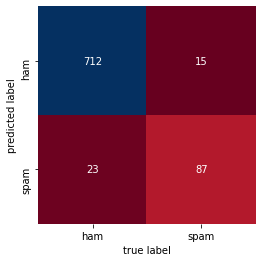


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.85      0.79      0.82       110

    accuracy                           0.95       837
   macro avg       0.91      0.89      0.90       837
weighted avg       0.95      0.95      0.95       837

Overall Accuracy :  95.46
Precision Score :  85.29
Recall Score :  79.09
AUC :  97.04 



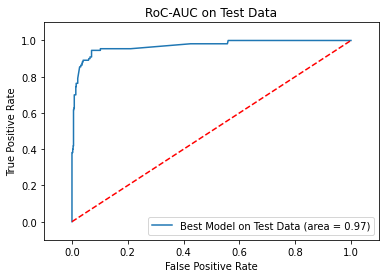

--------------------------------------------------------------------------

 Grdient Boosting Classifier
Wall time: 258 ms

 Confusion Matrix


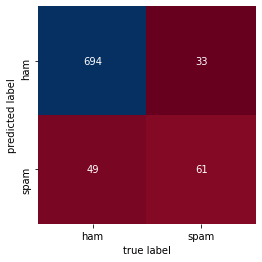


 Classification Report 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       727
           1       0.65      0.55      0.60       110

    accuracy                           0.90       837
   macro avg       0.79      0.75      0.77       837
weighted avg       0.90      0.90      0.90       837

Overall Accuracy :  90.2
Precision Score :  64.89
Recall Score :  55.45
AUC :  65.73 



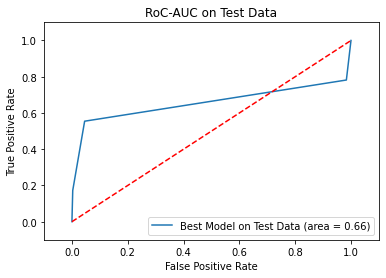

--------------------------------------------------------------------------

 Naive Bayes Classifier
Wall time: 4.46 ms

 Confusion Matrix


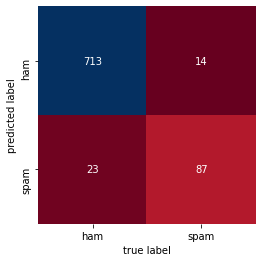


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.86      0.79      0.82       110

    accuracy                           0.96       837
   macro avg       0.92      0.89      0.90       837
weighted avg       0.95      0.96      0.95       837

Overall Accuracy :  95.58
Precision Score :  86.14
Recall Score :  79.09
AUC :  96.41 



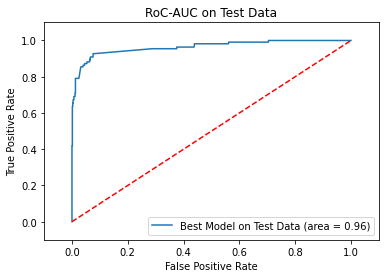

--------------------------------------------------------------------------
Wall time: 4.37 s


In [53]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_tf_m)

Models on Term Frequency - Bag of Words: Inverse Document Frequency data
Train Data Dimensions :  (4737, 53)
Test Data Dimensions :  (837, 53)

 Random Forest Classifier
Wall time: 1.45 s

 Confusion Matrix


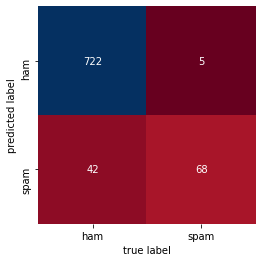


 Classification Report 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       727
           1       0.93      0.62      0.74       110

    accuracy                           0.94       837
   macro avg       0.94      0.81      0.86       837
weighted avg       0.94      0.94      0.94       837

Overall Accuracy :  94.38
Precision Score :  93.15
Recall Score :  61.82
AUC :  95.36 



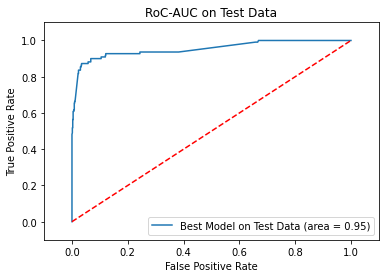

--------------------------------------------------------------------------

 AdaBoost Classifier
Wall time: 866 ms

 Confusion Matrix


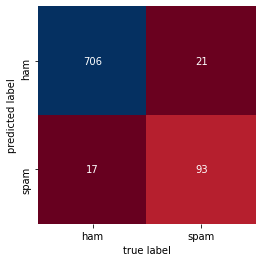


 Classification Report 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       727
           1       0.82      0.85      0.83       110

    accuracy                           0.95       837
   macro avg       0.90      0.91      0.90       837
weighted avg       0.96      0.95      0.95       837

Overall Accuracy :  95.46
Precision Score :  81.58
Recall Score :  84.55
AUC :  94.6 



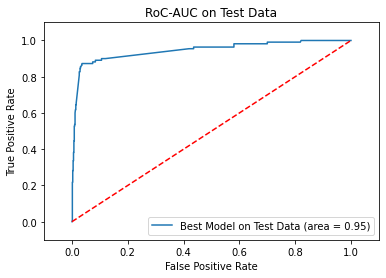

--------------------------------------------------------------------------

 Grdient Boosting Classifier
Wall time: 208 ms

 Confusion Matrix


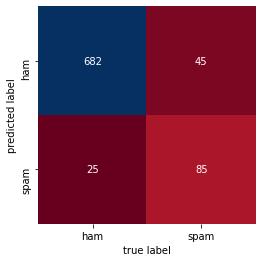


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       727
           1       0.65      0.77      0.71       110

    accuracy                           0.92       837
   macro avg       0.81      0.86      0.83       837
weighted avg       0.92      0.92      0.92       837

Overall Accuracy :  91.64
Precision Score :  65.38
Recall Score :  77.27
AUC :  85.85 



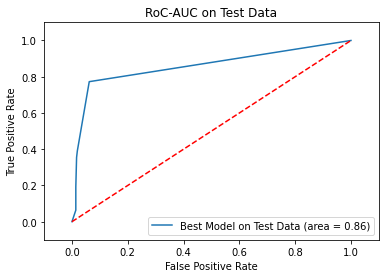

--------------------------------------------------------------------------

 Naive Bayes Classifier
Wall time: 4.46 ms

 Confusion Matrix


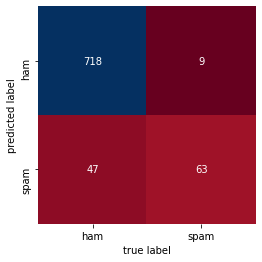


 Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       727
           1       0.88      0.57      0.69       110

    accuracy                           0.93       837
   macro avg       0.91      0.78      0.83       837
weighted avg       0.93      0.93      0.93       837

Overall Accuracy :  93.31
Precision Score :  87.5
Recall Score :  57.27
AUC :  94.62 



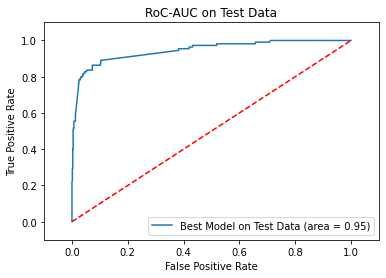

--------------------------------------------------------------------------
Wall time: 4.24 s


In [54]:
print('Models on Term Frequency - Bag of Words: Inverse Document Frequency data')
%time model_dvt(df_tfidf_m)

## 5.0 Hyper-parameter tuning models that used TF-BoW embedding data : 

### 5.1 : Grid-Search hyperparameter tuning on AdaBoost Classifier : 

In [55]:
Y = df_tf_m['Flag_spam']
X = df_tf_m.drop('Flag_spam', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (4737, 77)
Test Data Dimensions :  (837, 77)


In [56]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300],
               'learning_rate' : [1.0, 0.1, 0.05]}

ABC = AdaBoostClassifier()
#Building a 10 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ABC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

#Fitting the grid to the training data
%time grid_object.fit(X_train, Y_train)

Wall time: 28.1 s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.05],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 300}
Best_ROC-AUC :  96.05
Best model :  AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

 Confusion Matrix


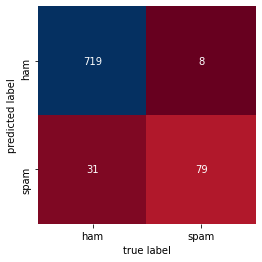


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       727
           1       0.91      0.72      0.80       110

    accuracy                           0.95       837
   macro avg       0.93      0.85      0.89       837
weighted avg       0.95      0.95      0.95       837

Overall Accuracy :  95.34
Precision Score :  90.8
Recall Score :  71.82
AUC :  96.61 



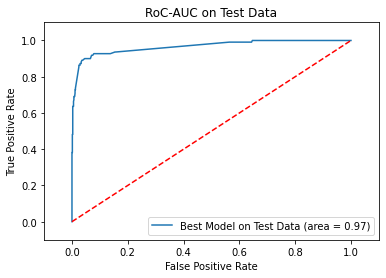

--------------------------------------------------------------------------
Wall time: 5.47 s
Cross Validation Accuracy :  95.46
Cross Validation Accuracy in every fold :  [98.81 95.24 95.24 97.62 91.67 96.43 96.43 95.18 92.77 95.18]


In [57]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

## 5.2 Grid-Search hyperparameter tuning on Random Forest Classifier : 

In [58]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train, Y_train)

Wall time: 53.6 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 7, 5, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

Best_ROC-AUC :  96.07
Best model :  RandomForestClassifier(criterion='entropy', max_depth=10)

 Confusion Matrix


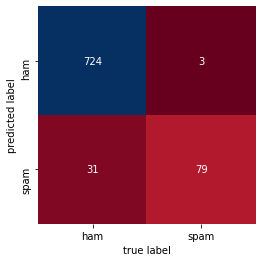


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       727
           1       0.96      0.72      0.82       110

    accuracy                           0.96       837
   macro avg       0.96      0.86      0.90       837
weighted avg       0.96      0.96      0.96       837

Overall Accuracy :  95.94
Precision Score :  96.34
Recall Score :  71.82
AUC :  96.44 



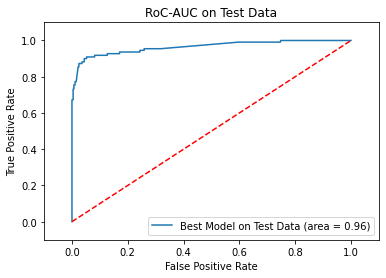

--------------------------------------------------------------------------
Wall time: 1.41 s
Cross Validation Accuracy :  94.86
Cross Validation Accuracy in every fold :  [100.    94.05  91.67  98.81  95.24  95.24  94.05  91.57  92.77  95.18]


In [59]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)